## Importando as bibliotecas necessárias

In [31]:
# Importar bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


## Buscando o csv com os dados principais e retirando linhas com alguma coluna nula/vazia

In [32]:
caminho_csv = r'C:\Users\santo\OneDrive\Documentos\case_classapp\dados_modelo\dados_modelo_regras_taxa_de_leitura_aplicadas.csv'
dados = pd.read_csv(caminho_csv)

## Separar os dados entre treino e teste

In [33]:
X = dados.drop('churn', axis=1)
y = dados['churn']
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## Criar o modelo Random Forest

In [34]:

modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_treino, y_treino)

RandomForestClassifier(random_state=42)

## Fazer predições no conjunto de teste

In [35]:

predicoes = modelo_rf.predict(X_teste)

## Calcular a matriz de confusão e exportar resultados

Matriz de Confusão:
[[327   0]
 [  3   3]]


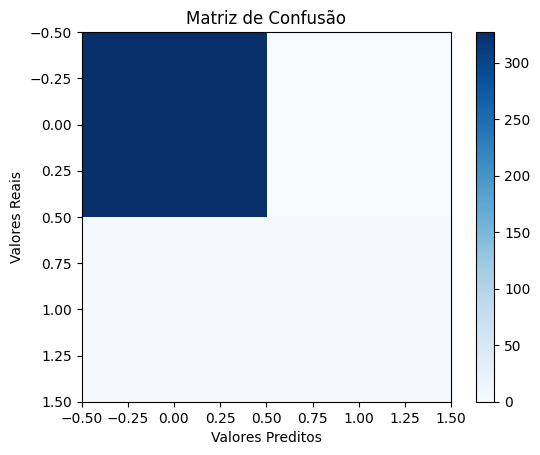

In [36]:
matriz_confusao = confusion_matrix(y_teste, predicoes)

print('Matriz de Confusão:')
print(matriz_confusao)

plt.imshow(matriz_confusao, cmap='Blues', interpolation='nearest')
plt.title('Matriz de Confusão')
plt.colorbar()
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.show()

df_resultado = pd.DataFrame({
    'alunos_ativos': X_teste['alunos_ativos'],
    'adesao': X_teste['adesao'],
    'taxa_de_leitura': X_teste['taxa_de_leitura'],
    'qtd_msgs_enviadas_por_aluno_por_dia': X_teste['qtd_msgs_enviadas_por_aluno_por_dia'],
    'meses': X_teste['meses'],
    'Churn_Real': y_teste,
    'Churn_Previsto': predicoes
})
df_resultado.to_excel(r'C:\Users\santo\OneDrive\Documentos\case_classapp\predicoes_modelo\dados_modelo_regras_taxa_de_leitura_aplicadas_predict.xlsx', index=False, header=True)